# 3. Manual Annotation

In [ ]:
import pandas as pd
import numpy as np
from random import sample
import random
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import plotly.express as px
import os
import warnings
import sys
import sklearn
sys.path.insert(0, '/work/twitter-nlp')

Choose one of your two datasets. For this subtask, the emoji prediction dataset doesn’t
make sense, so if that is one of your choices, pick the other one for this part of the assignment.


- [x] In the README file in the TweetEval corpus repository, there are links to research papers from the SemEval workshop, describing how each of the datasets was created and annotated. Locate the one that belongs to the dataset you’ve picked for this subtask and find the passages that describe in detail how the labels for the dataset were created. Read these passages carefully.

---
<br>
HatEval dataset consists of social media texts, specifically Twitter’s posts, against two targets: immigrants and women. Tweets were mainly collected in the time span from July to September 2018, with the exception of tweets that target women.  Approaches to collect tweets:
    1. monitoring potential victims of hate accounts
    2. downloading the history of identified haters
    3. filtering Twitter streams with keywords

During the annotation the following categories were annotated: 

- HS(Hate Speech) - if hate speech is occurring against one of the given targets (1) or if does not occur (0)
- Target Range - if hate speech occurs, additional category is annotated,indicating if the tweet is targetting generic group of people (0) or a specific individual (1).
- Aggressiveness - if hate speech occurs, additional category is annotated, indicating if the tweeter is aggressive (1) or not (0).



The dataset was annotated by annotators (crowd) and 2 experts (native or near-native speakers of British
English, having a long experience in annotating data for the specific task's subject).

---


Since we had chosen hatespeech detection, and emoji prediction, we annotated the hatespeech `train_text.txt` file. </br>

- [x] Next, select a random sample of 100 tweets from the training set. Working independently from each other and without consulting the labels published in the TweetEval corpus, each member of your group should now go manually through this sample and label them according to the same scheme.

To annotate the data semiautomatically we created a script, to run locally on each of our PC's: 

```
import pandas as pd
import random
import os

lst = []
with open(r'tweeteval/datasets/hate/train_text.txt', 'r') as f:
    lst = [line.strip() for line in f.readlines()]
    random.seed(404)
    sample100 = random.sample(lst,100)

def label():
    lst = []
    for i in range(100):
        print('Rate each attribute by either 1 or 0')
        print(i, sample100[i])
        inp = input('Was this hatespeech?').strip()
        if  inp == '1':
            inp_gndr = input('Was this hateful based on gender?')
            inp_rcst = input('Was this racist?')
            inp_nat = input('Was this hateful based on nationality/ethnicity')
            inp_sxl = input('Was this homophobic?')
            inp_ind = input('Was the hate directed towards an individual?')
        else:
            inp_gndr = inp_rcst = inp_nat = inp_sxl = inp_ind = 0

        lst.append([inp, inp_gndr, inp_rcst,inp_nat,inp_sxl,inp_ind])
        os.system('clear')
    
    df = pd.DataFrame(lst, columns = ["hs/no-hs", 'gender-based', 'racist', 'nationality/ethnicy-based', 'homophobic','directed towards an individual'])
    df.to_csv('out.csv')
    return df

if __name__ == '__main__':
    my_labels = label()

- [x] Report on the inter-annotator agreement, including the agreement with the published labels, and discuss what phenomena in the data caused the biggest problems for inter-annotator agreement.

For the purpose of compactness and simplicity, a dictionary of dataframes `li` was created, including manual annotation results for each person:

In [ ]:
li = {}
# for filename in glob.glob("/work/data/manual-labeling/*.csv"):
#     df = pd.read_csv(filename, index_col=None, header=0)
#     df = df.drop(columns = df.columns[0],axis = 1)
#     csv_index = filename.find('s_manual_annotation.csv')
#     if filename[csv_index-4:csv_index] =='gust': csv_index += 1
#     li.setdefault(filename[27:csv_index],df)

[li.setdefault(filename[39:filename.find('s_manual_annotation.csv')], pd.read_csv(filename, index_col=None, header=0, usecols = ['hs/no-hs', 'gender-based', 'racist', 'nationality/ethnicy-based', 'homophobic', 'directed towards an individual'])) for filename in glob.glob("/work/twitter-nlp/data/manual-labeling/*.csv")];

Results of manual annotation can thus be looked up in the following way:

Dataframe `results_sum` contains the number of people marking the tweet as '1' in the given category

In [ ]:
results_sum = pd.concat([li['juraj'],li['mirka'], li['gust'], li['jannik'], li['franek']]).groupby(level=0).sum()

#### Visualizations

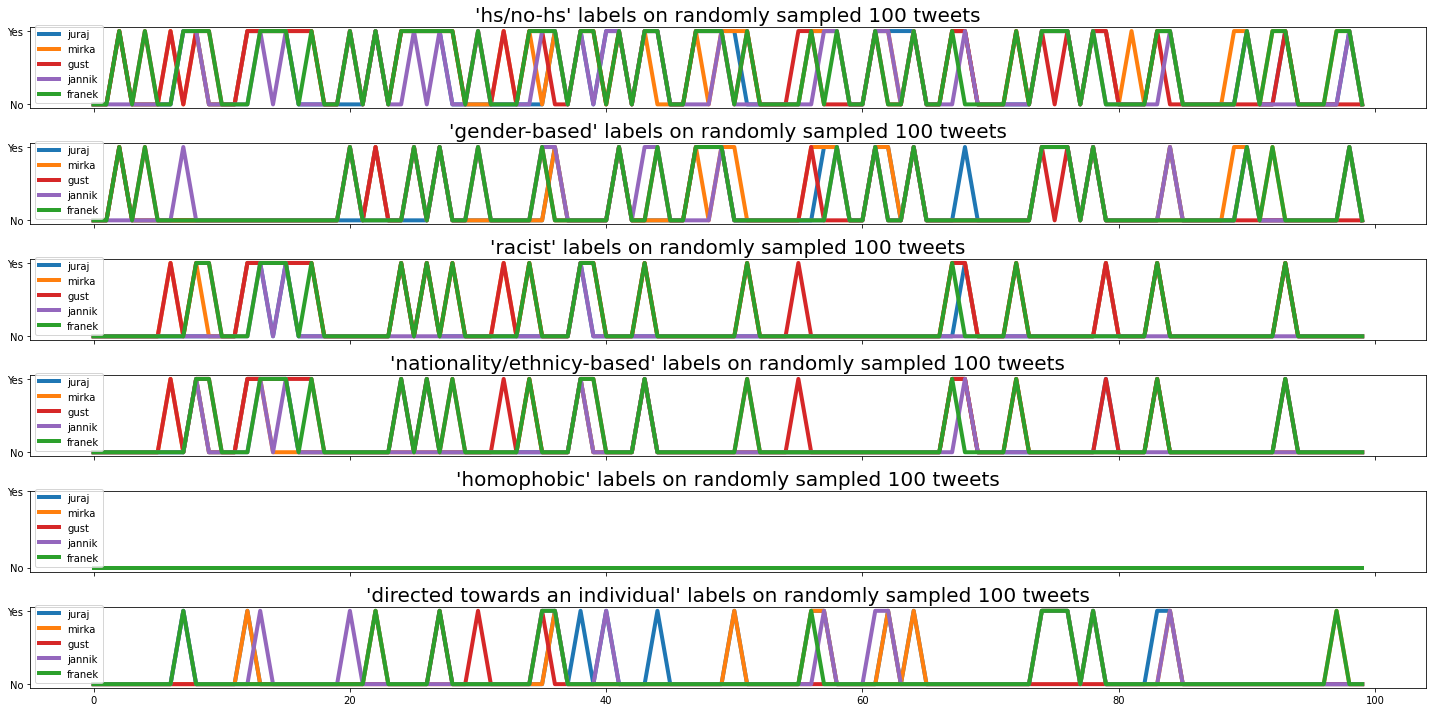

In [ ]:
names = list(li.keys())
clr = ['tab:blue','tab:orange','tab:red','tab:purple','tab:green']

name_columns = {}
for name in li.keys():
    name_columns[name] = list(li[name].columns)

_,axes = plt.subplots(nrows=6, figsize=(20,10),sharex=True)
i = 0
for column in (name_columns[name]):
    for x,name in enumerate(names):
        axes[i].plot(li[name][name_columns[name][i]], clr[x], label = name,linewidth=4.0)
        axes[i].set_title(f"'{column}' labels on randomly sampled 100 tweets", fontsize = 20)
        axes[i].set_yticks([0,1])
        axes[i].set_yticklabels(['No','Yes'])
        axes[i].legend()
    i += 1

_.tight_layout()

Based on this visualization, we decided to not include the _homophobic_ label in later visualizations. 

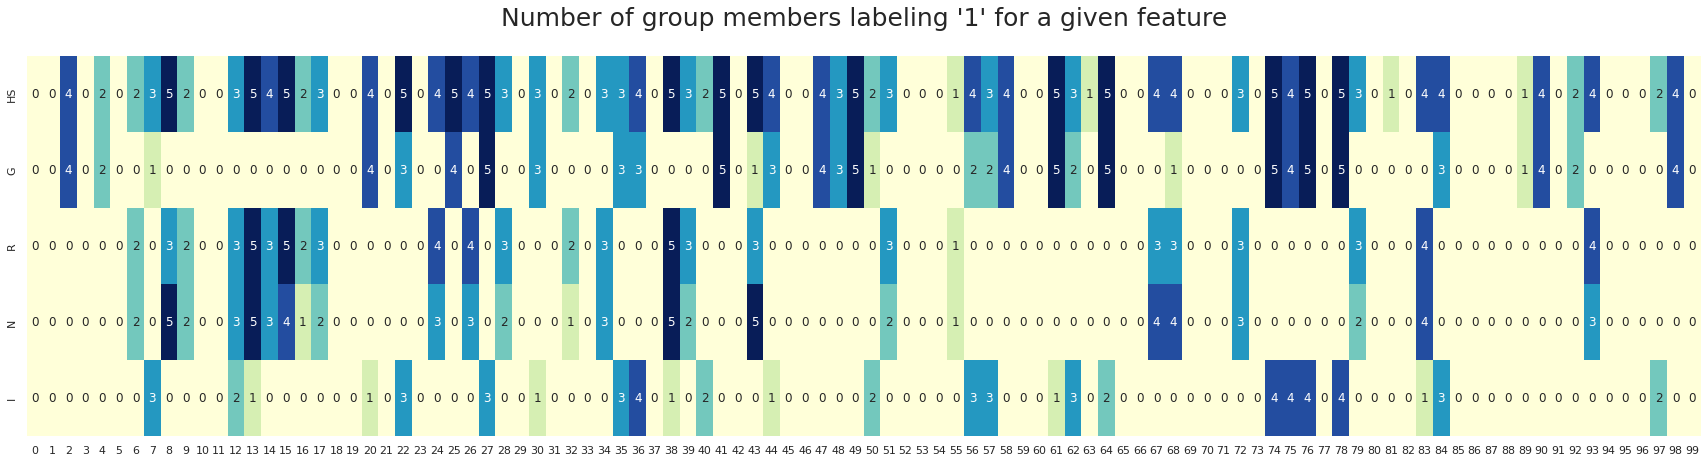

In [ ]:
sns.set(rc={'figure.figsize': (30, 7)})
tr_results_sum = results_sum.transpose()
tr_results_sum = tr_results_sum.drop('homophobic', axis = 0)
#tr_results_sum = tr_results_sum.drop('ratio', axis = 0)

labels = ['HS','G','R','N','I']

sns.heatmap(tr_results_sum, annot = True, cmap = 'YlGnBu', linecolor='w', cbar = False, yticklabels=labels)
plt.title("Number of group members labeling '1' for a given feature", fontsize = 25, pad = 30);

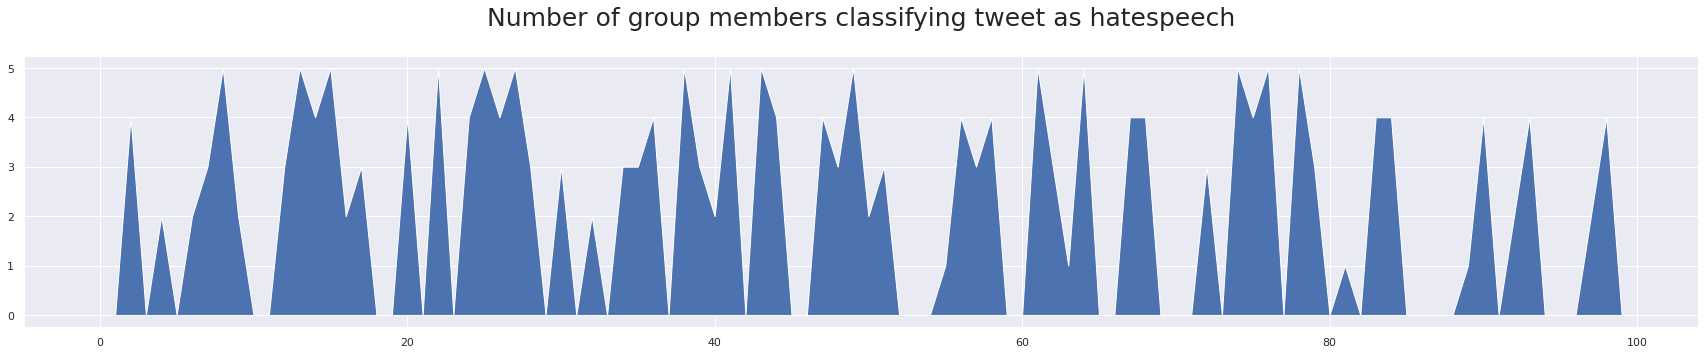

In [ ]:
from matplotlib import cm

fig,ax= plt.subplots(1, 1,figsize=(30,5))
x=results_sum['hs/no-hs'].index
y1 = results_sum['hs/no-hs']
ax.fill_between(x, 0, y1, cmap = 'coolwarm')
ax.set_title('Number of group members classifying tweet as hatespeech', fontsize = 25, pad = 30);

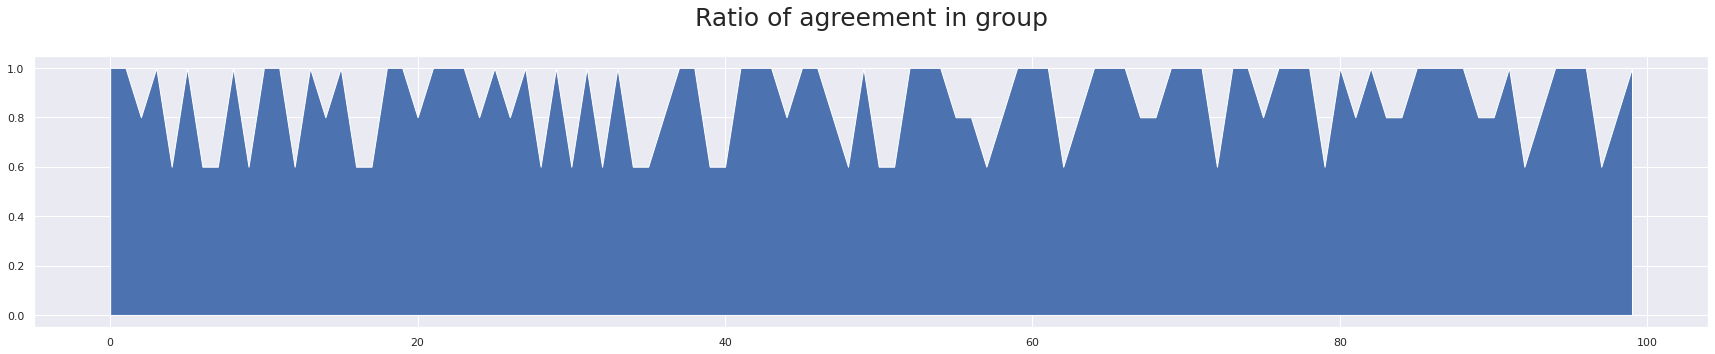

In [ ]:
pd.options.mode.chained_assignment = None     #to ignore warnings

fig,ax= plt.subplots(1, 1,figsize=(30,5))
disagreement=[]

x=results_sum['hs/no-hs'].index
results_sum['ratio'] = results_sum['hs/no-hs']/5

for i in range(len(results_sum['ratio'])):
    result=results_sum['ratio'][i]
    if result==0.0 or result==1.0:
        results_sum['ratio'][i]=1
    elif result==0.2 or result==0.8:
        results_sum['ratio'][i]=0.8
    elif result==0.4 or result==0.6:
        disagreement.append(i)
        results_sum['ratio'][i]=0.6

y=results_sum['ratio']
ax.fill_between(x, 0, y)
ax.set_title('Ratio of agreement in group', fontsize = 25, pad = 30);

## Survey

In addition to our manual annotation, we conducted an online survey including the same random sample of 100 tweets from the dataset. The number of participants was 11 and roughly belonged to the same age group as us. 

This allowed us to compare the results of manual annotation not only inside the group, but with an external sample of people, as well. 

The `dfcrowd` datadrame marks the tweet '0' or '1' based on what most of the surveytakers marked it.

In [ ]:
dfcrowd = pd.read_csv('/work/twitter-nlp/data/manual-labeling/crowd_annotation/crowd_annotation.csv', index_col=None, header=0)

names = list(li.keys())
dfcrowd['ours'] = np.nan
for i in range(100):
    sum1=0
    for name in names:
        sum1+=li[name]['hs/no-hs'][i]
    if sum1>=3:
        dfcrowd['ours'][i]=1
    else:
        dfcrowd['ours'][i]=0

dfcrowd.head()

,annotation,ours
0,0,0.0
1,0,0.0
2,1,1.0
3,0,0.0
4,1,0.0


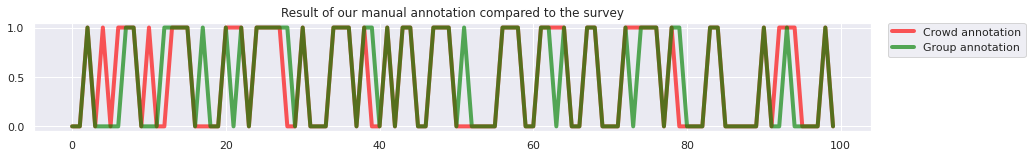

In [ ]:
plt.figure(figsize=(15,2)) 
overlapping=0.650
plt.plot(dfcrowd['annotation'],label='Crowd annotation',color='red',linewidth=4,alpha=overlapping)
plt.plot(dfcrowd['ours'],color='green',label='Group annotation',linewidth=4,alpha=overlapping)
plt.title('Result of our manual annotation compared to the survey')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

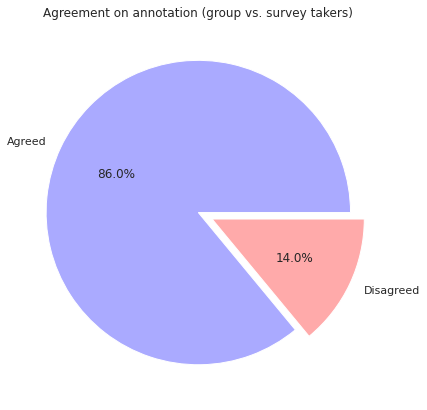

In [ ]:
agreed=sum(dfcrowd['annotation']==dfcrowd['ours'])
disagreement2=[]

for i in range(len(dfcrowd['annotation'])):
    if dfcrowd['annotation'][i]!=dfcrowd['ours'][i]:
        disagreement2.append(i)

plt.title('Agreement on annotation (group vs. survey takers)')
plt.pie([agreed,100-agreed],labels=['Agreed','Disagreed'],colors=['#aaaaff','#ffaaaa'],explode=(0, 0.1),autopct='%1.1f%%');

In [ ]:
#loading the tweets and according label from our annotated sample
lst = []
with open(r'/work/twitter-nlp/data/tweeteval/datasets/hate/train_text.txt', 'r') as f:
    lst = [line.strip() for line in f.readlines()]
    random.seed(404)
    sample100 = random.sample(lst,100)
lst2 = []
with open(r'/work/twitter-nlp/data/tweeteval/datasets/hate/train_labels.txt', 'r') as f:
    lst2 = [line.strip() for line in f.readlines()]
    random.seed(404)
    sample100p = random.sample(lst2,100)


In [ ]:
#streamlit
dfcrowd.to_csv("/work/twitter-nlp/streamlit/data/survey.csv")
dftweets = pd.DataFrame(sample100, columns=['tweets'])
dftweets.to_csv("/work/twitter-nlp/streamlit/data/tweets.csv")
dftruth = pd.DataFrame(sample100p, columns=['value'])
dftruth.to_csv("/work/twitter-nlp/streamlit/data/GT.csv")


,GT,Tweet
0,1,NaN
1,1,NaN
2,1,NaN
3,1,NaN
4,0,NaN
5,1,NaN
6,1,NaN
7,0,NaN
8,1,NaN
9,1,NaN


[3, 4, 6, 9, 14, 16, 19, 22, 32, 33, 40, 44, 58, 62, 63, 68, 79, 83, 92]

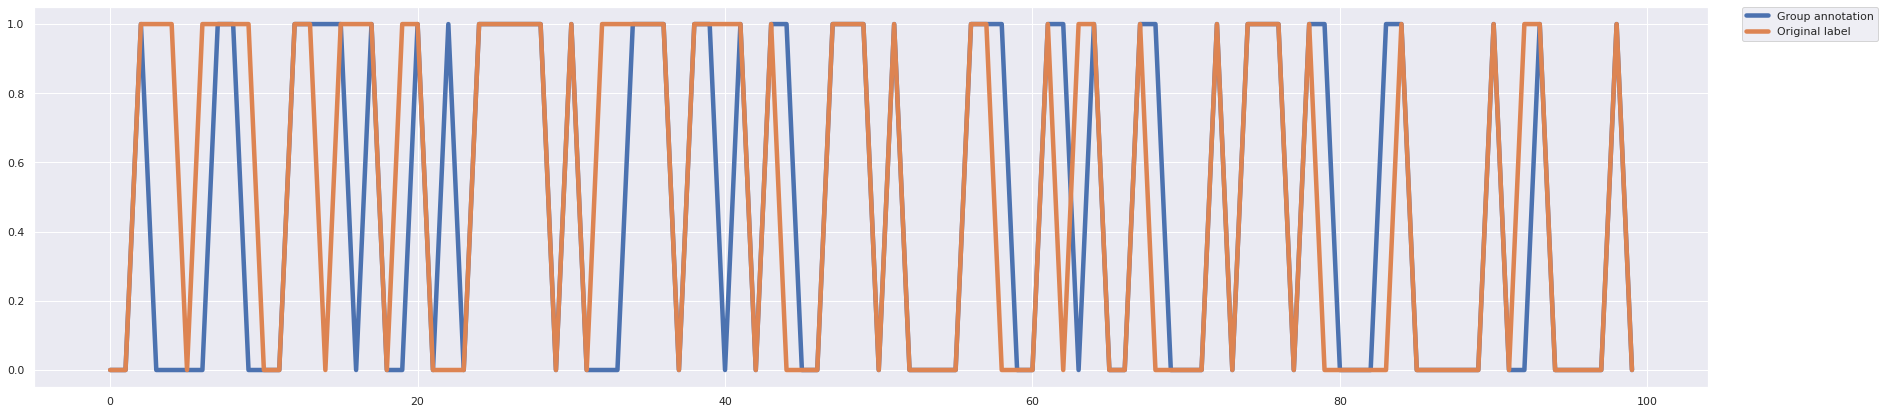

In [ ]:
#showing
plt.plot(dfcrowd['ours'],label='Group annotation',linewidth=4.5)
plt.plot(sample100p,label='Original label',linewidth=4.5)

#plt.plot(dfcrowd['annotation'],label='Crowd annotation')
plt.legend()
lst=[]
lst2=[]
difference=[]
for i in range(len(sample100p)):
    if int(sample100p[i])==dfcrowd['ours'][i]:
        lst.append(i)
    if int(sample100p[i])==dfcrowd['annotation'][i]:
        lst2.append(i)
    if int(sample100p[i])!=dfcrowd['ours'][i]:
        difference.append(i)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
plt.savefig("test.svg", format="svg")

In [ ]:
df=[[],[]]
for i in [3, 4, 6, 9, 14, 16, 19, 22, 32, 33, 40, 44, 58, 62, 63, 68, 79, 83, 92]:
    df[0].append(sample100p[i])
    df[1].append(sample100[i])

dfpd = pd.DataFrame({'Ground Truth':df[0],'Tweet':df[1]}, columns=['Ground Truth','Tweet'])
dfpd.to_csv("/work/twitter-nlp/streamlit/data/dfpd.csv")

77

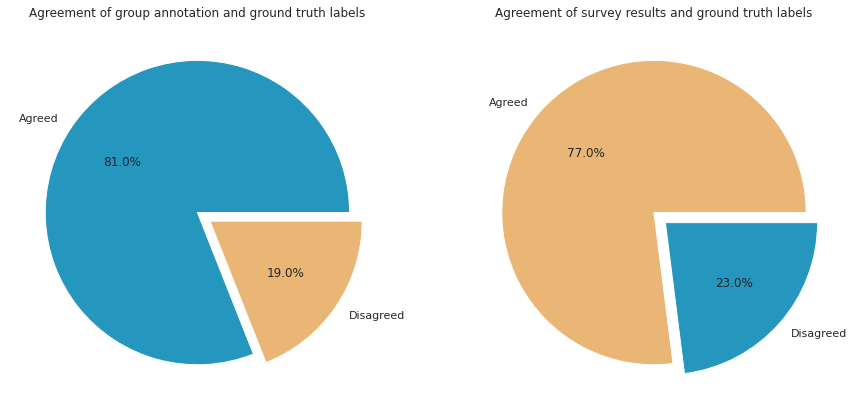

In [ ]:
_,ax1=plt.subplots(1,2,figsize=(15,7))
#ax1.set_title('Agreement on annotation (group vs. survey takers)')
len(lst)
len(lst2)
ax1[0].pie([len(lst),100-len(lst)],labels=['Agreed','Disagreed'],colors=['#2596be','#eab676'],explode=(0, 0.1),autopct='%1.1f%%');
ax1[0].set_title('Agreement of group annotation and ground truth labels')
ax1[1].pie([len(lst2),100-len(lst2)],labels=['Agreed','Disagreed'],colors=['#eab676','#2596be'],explode=(0, 0.1),autopct='%1.1f%%');
ax1[1].set_title('Agreement of survey results and ground truth labels')
len(lst)
len(lst2)

Following are the tweets where the majority of group annotations differed from the ground truth value in hatespeech labelling. 

There could be a couple of reasons for this disagreement:
- the tweets were manually labelled before reading the definition of hate speech (some group members could already have prior knowledge)
- some tweets could be understood in varying ways depending on the context
- for some tweets, the intensions of the author were unclear (given tweet could be understood as a joke in some settings)

In [ ]:
print('Ground truth  Tweet')
for i in difference:
    print('     '+sample100p[i]+'        '+sample100[i] )

Ground truth  Tweet
     1        #SaudiArabia has beheaded Indonesian migrant worker despite several direct pleas from #Indonesia's Pres. Widodo to show mercy #ucanews #humanrights #voiceforthevoiceless @user @user @user @user @user @user @user
     1        @user But how can they be raped if no men are there to rape them?
     1        @user Agreed MJ! Any Country that has an #OpenBorders policy is in trouble! #BuildThatWall #VoteRedToSaveAmerica #AmericaFirst
     1        Daily Mail pulls story about ‘˜migrant-infested’ #Paris suburb after backlash
     0        #FactCheck true #WakeUpAmerica #LeftistSedition #DemocratsHateAmerica #OpenYourEyes #FreeYourMind #BuildTheWall #StopTheInvasion
     1        Join American Sheriffs to Secure Americas Borders! #BuildThatWall
     1        Did you know75% of deported immigrants make it back across the borders within 1 year.  This includes deported gang members.
     0        Dumb Cunt rides like a Whore
     1        Immigrants convicted of

## Annotation metrics

In [ ]:
from nltk.metrics.agreement import AnnotationTask
listoftup=[]
for j in range(100):
    for i in names:
        listoftup.append((i,j,li[i]['hs/no-hs'][j]))

t=AnnotationTask(listoftup)
print('Avg Ao: ',t.avg_Ao())
print('Pi: ',t.pi())
print('S: ',t.S())
print('Alpha: ',t.alpha())
print('Multi kappa: ',t.multi_kappa())

Avg Ao:  0.774
Pi:  0.5367257580478526
S:  0.548
Alpha:  0.5376523065317568
Multi kappa:  0.5388884354851873


#### Cohen's Kappa (κ)
Based on the assumptions of each metric, we have decided to choose the <strong>Cohen's kappa</strong> as our primary metric, as: 
- Each coder had their own preferences (individual annotator bias)
- Categories were not equally likely

As there were more than two annotators, we are using the generalized version of the metric - <strong>multi-κ</strong> (Fleiss' kappa) ([Artstein & Poesio, 2008](https://dl.acm.org/doi/10.1162/coli.07-034-R2))

Name:  Avg Agreement   Kappa
juraj:     0.73      0.45999999999999996
mirka:     0.78      0.56
gust:     0.8      0.6000000000000001
jannik:     0.7      0.3999999999999999
franek:     0.84      0.6799999999999999


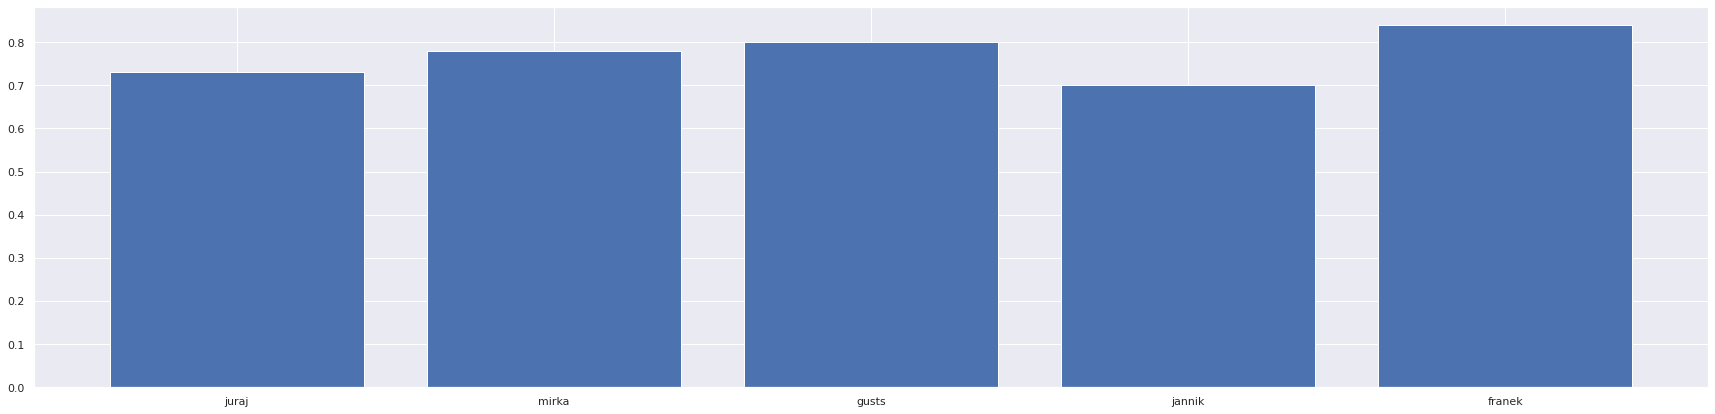

In [ ]:
from nltk.metrics.agreement import AnnotationTask
listofscores=[[],[]]
print('Name:  Avg Agreement   Kappa')
for i in names:
    listoftup=[]
    for j in range(100):
        listoftup.append((i,j,li[i]['hs/no-hs'][j]))
        listoftup.append(('annotation',j,int(sample100p[j])))
    t=AnnotationTask(listoftup)
    print(i+':     '+str(t.avg_Ao())+'      '+str(t.kappa()))
    listofscores[0].append(t.avg_Ao())
    listofscores[1].append(t.kappa())
plt.bar(['juraj','mirka','gusts','jannik','franek'],listofscores[0]);

In [ ]:
print(sum(listofscores[0])/len(listofscores[0]))
print(sum(listofscores[1])/len(listofscores[1]))

0.7699999999999999
0.54


In [ ]:
sample100p = [int(x) for x in sample100p]
dfcrowd['ground_truth'] = sample100p
dfcrowd.head()

,annotation,ours,ground_truth
0,0,0.0,0
1,0,0.0,0
2,1,1.0,1
3,0,0.0,1
4,1,0.0,1


#### Confusion Matrix

In [ ]:
conf_ours = sklearn.metrics.confusion_matrix(dfcrowd['ground_truth'],dfcrowd['ours'])
conf_survey = sklearn.metrics.confusion_matrix(dfcrowd['ground_truth'],dfcrowd['annotation'])

#### Errors of Commission

Errors of commission represent the fraction of values that were predicted to be in a class but do not belong to that class. They are a measure of false positives.

In [ ]:
print('Class : Hate speech')
print('Error of Commission (group):', conf_ours[1][0]/100) 
print('Error of Commission (survey):', conf_survey[1][0]/100)

print()

print('Class : Not Hate Speech')
print('Error of Commission (group):', conf_ours[0][1]/100)
print('Error of Commission (survey):', conf_survey[0][1]/100)

Class : Hate speech
Error of Commission (group): 0.11
Error of Commission (survey): 0.12

Class : Not Hate Speech
Error of Commission (group): 0.08
Error of Commission (survey): 0.11


#### Errors of Omission
Errors of omission represent the fraction of values that belong to a class but were predicted to be in a different class. They are a measure of false negatives. 

In [ ]:
print('Class : Hate speech')
print('Error of Ommission (group):', conf_ours[0][1]/100) 
print('Error of Ommission (survey):', conf_survey[0][1]/100)

print()

print('Class : Not Hate Speech')
print('Error of Ommission (group):', conf_ours[1][0]/100)
print('Error of Ommission (survey):', conf_survey[1][0]/100)

Class : Hate speech
Error of Ommission (group): 0.08
Error of Ommission (survey): 0.11

Class : Not Hate Speech
Error of Ommission (group): 0.11
Error of Ommission (survey): 0.12


#### Producer Accuracy
Producer accuracy is the probability that a value in a given class was classified correctly.

In [ ]:
print('Class : Hate speech')
print('Producer Accuracy (group):', conf_ours[1][1]/conf_ours[:,1].sum())
print('Producer Accuracy (survey):', conf_survey[1][1]/conf_survey[:,1].sum())

print()

print('Class : Not Hate Speech')
print('Producer Accuracy (group):', conf_ours[0][0]/conf_ours[:,0].sum()) 
print('Producer Accuracy (survey):', conf_survey[0][0]/conf_survey[:,0].sum())

Class : Hate speech
Producer Accuracy (group): 0.8297872340425532
Producer Accuracy (survey): 0.7755102040816326

Class : Not Hate Speech
Producer Accuracy (group): 0.7924528301886793
Producer Accuracy (survey): 0.7647058823529411


#### User Accuracy
User accuracy is the probability that a value predicted to be in a certain class really is that class. The probability is based on the fraction of correctly predicted values to the total number of values predicted to be in a class.

In [ ]:
print('Class : Hate speech')
print('User Accuracy (group):', conf_ours[1][1]/conf_ours[1].sum()) 
print('User Accuracy (survey):', conf_survey[1][1]/conf_survey[1].sum())

print()

print('Class : Not Hate Speech')
print('User Accuracy (group):', conf_ours[0][0]/conf_ours[0].sum()) 
print('User Accuracy (survey):', conf_survey[0][0]/conf_survey[0].sum())

Class : Hate speech
User Accuracy (group): 0.78
User Accuracy (survey): 0.76

Class : Not Hate Speech
User Accuracy (group): 0.84
User Accuracy (survey): 0.78


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bf1f20fb-a6c0-4ea2-8567-a5a41eea1d8a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>